In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("bank-loan.csv")

In [3]:
data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [31]:
data.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [11]:
data.size

7650

In [12]:
data.dtypes

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object

In [34]:
data.default=data.default.fillna(2)

In [40]:
data.default=data.default.astype(int)

In [41]:
data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


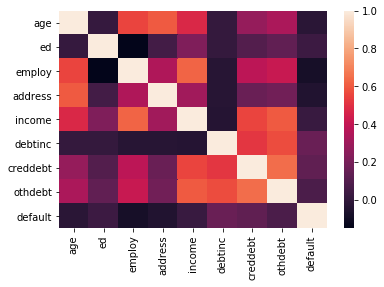

In [43]:
sns.heatmap(data.corr())

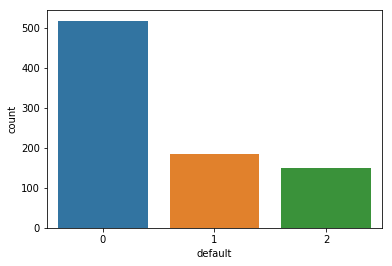

In [44]:
sns.countplot(data.default)

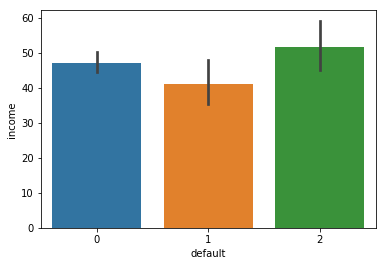

In [59]:
sns.barplot(x='default',y='income',data=data)

Text(0, 0.5, 'Importance')

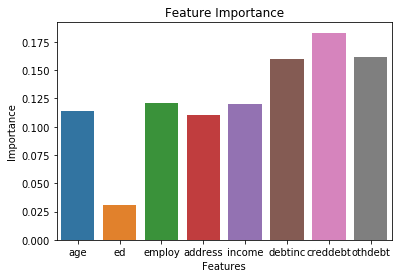

In [57]:
#Feature importance plotting
from sklearn.ensemble import RandomForestRegressor

names=list(data)
names = names[:8]

fea = RandomForestRegressor(n_estimators = 100, random_state = 126).fit(data.iloc[:,:8],data.iloc[:,8])

sns.barplot(x = names ,y = fea.feature_importances_)  

plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')

### we will seperate the missing values rows

In [61]:
train=data.loc[data['default']!=2]

In [63]:
train.default.unique()

array([1, 0], dtype=int64)

In [64]:
test=data.loc[data.default==2]
test=test.iloc[:,0:8]

### We will seperate the data on the basis of dependent and independent variable and split it into train and test data

In [75]:
x=train.iloc[:,0:8]
y=train.iloc[:,8]

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.3)

In [107]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\Users\Vikash Singh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [108]:
from sklearn import metrics
a=accuracy_score(y_test,y_pred)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cnf_matrix)
print("Accuracy: %f"%a)

Confusion Matrix:
[[148  16]
 [ 20  26]]
Accuracy: 0.828571


In [109]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 10,
                               max_depth=5, min_samples_leaf=7)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [110]:
dt_pred = clf_gini.predict(X_test)
print("Accuracy score %f" % accuracy_score(y_test,dt_pred))
c=confusion_matrix(y_test,dt_pred)
print("Confusion Matrix:")
print(c)

Accuracy score 0.776190
Confusion Matrix:
[[134  30]
 [ 17  29]]


In [122]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, random_state=0,criterion="gini",max_depth=10,max_leaf_nodes=9)
classifier.fit(X_train, y_train)
rf_pred = classifier.predict(X_test)

In [123]:
print("Accuracy score %f" % accuracy_score(y_test,rf_pred))
d=confusion_matrix(y_test,rf_pred)
print(d)

Accuracy score 0.842857
[[155   9]
 [ 24  22]]
